In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 

x_data = pd.read_csv("data1.csv")
x_data = x_data.dropna()
x_data = x_data.astype('float32')
y_data = x_data['Class']
y_data = y_data.astype(int)
x_data.drop(['Class'], inplace=True, axis=1)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

x_data = x_data.values
x_train = x_train.values
x_test = x_test.values

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 2 

# this is our input placeholder
input_img = Input(shape=(28,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(28, activation='sigmoid')(encoded)

Using TensorFlow backend.


In [3]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [4]:
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 1s 6us/step - loss: 1.1135 - val_loss: 1.0642
Epoch 2/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0428 - val_loss: 1.0366
Epoch 3/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0203 - val_loss: 1.0238
Epoch 4/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0122 - val_loss: 1.0188
Epoch 5/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0090 - val_loss: 1.0166
Epoch 6/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0072 - val_loss: 1.0151
Epoch 7/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0059 - val_loss: 1.0140
Epoch 8/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0050 - val_loss: 1.0132
Epoch 9/20
227845/227845 [==============================] - 1s 5us/step - loss: 1.0044 - val_loss: 1.

In [5]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(7, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(7, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


<Figure size 2000x400 with 20 Axes>

In [6]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()



,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,1.007985,0.001720
std,7.477313,0.041443
min,0.107642,0.000000
25%,0.348148,0.000000
50%,0.556925,0.000000
75%,0.870688,0.000000
max,1573.688477,1.000000


Text(0.5, 1.0, 'Top ten reconstruction errors')

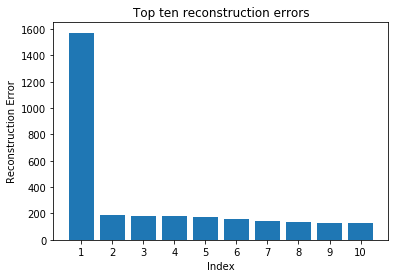

In [7]:
sorted_mag = np.sort(-mse, axis=0)
sorted_mag = sorted_mag.astype(int)

sorted_mag = -sorted_mag[0:10]
x = np.arange(1,11,1)
plt.bar(x,sorted_mag,align='center')
plt.xticks(x, x)
plt.ylabel('Reconstruction Error')
plt.xlabel('Index')
plt.title('Top ten reconstruction errors')

In [8]:
encoded_imgs = encoder.predict(x_data)
i = np.where(y_data == 1)
x_1 = encoded_imgs[i,0]
y_1 = encoded_imgs[i,1]
i = np.where(y_data == 0)
x_0 = encoded_imgs[i,0]
y_0 = encoded_imgs[i,1]


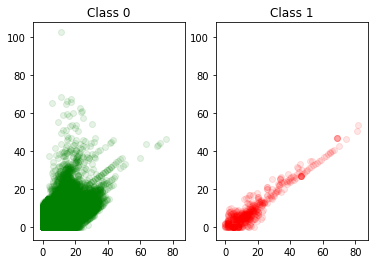

In [9]:
ax1 = plt.subplot(121)
plt.scatter(x_0, y_0,color='green', alpha=0.1)
plt.title('Class 0')
ax3 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.scatter(x_1, y_1,color='red', alpha=0.1)
plt.title('Class 1')
plt.show()

## Deep Autoencoder

In [ ]:
from keras import backend as K
K.clear_session()

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import normalize

x_data = pd.read_csv("data1.csv")
x_data = x_data.dropna()
x_data = x_data.astype('float32')
y_data = x_data['Class']
y_data = y_data.astype(int)
x_data.drop(['Class'], inplace=True, axis=1)
#x_data = normalize(x_data, axis=0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

x_data = x_data.values
x_train = x_train.values
x_test = x_test.values

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2 
input_img = Input(shape=(x_train.shape[1],))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(14, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)


decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-4]
decoder_layer2 = autoencoder.layers[-3]
decoder_layer3 = autoencoder.layers[-2]
decoder_layer4 = autoencoder.layers[-1]

decoder = Model(encoded_input,  ( decoder_layer4(decoder_layer3( decoder_layer2(decoder_layer1(encoded_input)) ))  ) )

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(7, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(7, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [ ]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

In [ ]:
sorted_mag = -np.sort(-mse, axis=0)
#sorted_mag = sorted_mag.astype(int)

sorted_mag = sorted_mag[0:10]
x = np.arange(1,11,1)
plt.bar(x,sorted_mag,align='center')
plt.xticks(x, x)
plt.ylabel('Reconstruction Error')
plt.xlabel('Index')
plt.title('Top ten reconstruction errors')

In [ ]:
encoded_imgs = encoder.predict(x_data)
i = np.where(y_data == 1)
x_1 = encoded_imgs[i,0]
y_1 = encoded_imgs[i,1]
i = np.where(y_data == 0)
x_0 = encoded_imgs[i,0]
y_0 = encoded_imgs[i,1]


In [ ]:
ax1 = plt.subplot(121)
plt.scatter(x_0, y_0,color='green', alpha=0.1)
plt.title('Class 0')
ax3 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.scatter(x_1, y_1,color='red', alpha=0.1)
plt.title('Class 1')
plt.show()